![](https://aivietnam.ai/wp-content/uploads/2019/07/chap7_logo_1.png)

Học về **Linear Regression** và dùng giải thuật `Backpropagation` (lan truyền ngược) để tìm ra các tham số tối ưu cho một dataset.

Linear Regression dùng để tiên đoán giá trị từ input, và nó giả định mối quan hệ giữa input và output là **tuyến tính**.

### I. Các bước cần làm khi dùng linear regression 

- Chuẩn bị và xử lý dữ liệu
- Xây dựng mô hình
- Xây dưng hàm loss
- Tìm bộ tham số dùng giải thuật backpropagation 

#### Tìm bộ tham số dùng giải thuật Backpropagation 


![](https://aivietnam.ai/wp-content/uploads/2019/07/chap7-linear_3.png)

### II. Áp dụng cho bài toán dự đoán giá nhà 

In [3]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('my_house_price_prediction.csv', delimiter=',')
m = data.shape[0]
data

array([[3.87, 5.38],
       [2.29, 3.45],
       [5.17, 6.94],
       [4.93, 7.1 ],
       [4.  , 5.47],
       [3.97, 5.31],
       [6.77, 8.89],
       [2.48, 4.08],
       [2.85, 4.59],
       [6.43, 8.52],
       [6.99, 8.63],
       [2.74, 4.29],
       [2.07, 3.34],
       [3.64, 5.48],
       [5.66, 7.4 ],
       [1.85, 3.3 ],
       [4.73, 6.19],
       [4.55, 6.46],
       [6.4 , 8.65],
       [2.14, 3.35]])

In [9]:
m = data.shape[0]
X = data[:, 0]

# sử dụng 1: để tạo thành 1 vector (cột)
y = data[:, 1:]

# hàm np.c_ tương tự `numpy.concatenate`
X_b = np.c_[np.ones((m, 1)), X]

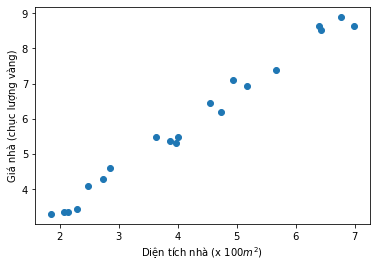

In [11]:
plt.scatter(X, y)

# sử dụng công thức toán học `$ ... $`
plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.show()

Trong bài này sử dụng `batch gradient descent`, tức là dùng tất cả các mẫu dữ liệu trong bộ dữ liệu để tính loss trung bình và để giá trị đạo hàm trung bình cho từng tham số.

- Tính output 

![](https://imgur.com/zkh3hVV.png)

- Tính loss (hàm loss này là trên toàn bộ dữ liệu), nhiều tài liệu ghi 1/2 (thực chất giá trị này chỉ để đạo hàm triệt tiêu 2, không ảnh hưởng)

![](https://imgur.com/b5rD4gl.png)

- Tính đạo hàm cho từng tham số:

![](https://imgur.com/moW00GR.png)

- Cập nhật tham số:
![image.png](https://imgur.com/5lMAXfz.png)

In [15]:
print(X_b.shape)
print(y.shape)
X_b.T.shape 

(20, 2)
(20, 1)


(2, 20)

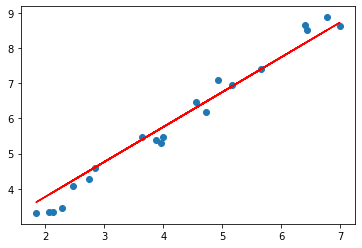

In [20]:
def batch_gradient_descent():
    n_itertaions = 50
    learning_rate = 0.01
    
    # khởi tạo gía trị tham số 
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_itertaions):
        # tinh output
        # có thể sử dụng np.dot(X_b, thetas)
        # X_b (20 , 2) ; thetas (2, 1) 
        # ---> output (20 , 1) (same y)
        output = X_b.dot(thetas)
        
        # tính loss 
        loss = (output - y)**2
        
        # tính đạo hàm cho loss 
        loss_grd = 2*(output - y) / m
        
        # tính đạo hàm cho các tham số 
        # X_b.T (2, 20); loss_grd (20, 1)
        # ---> np.dot(X_b.T, loss_grd) -> (2, 1) (thetas)
        gradients = X_b.T.dot(loss_grd)
        
        # cập nhật tham số 
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss) / m
        losses.append(mean_loss)
        
    return thetas_path, losses 

bgd_thetas, losses = batch_gradient_descent()

# plt.scatter: vẽ biểu đồ giá trị phân tán X, y
plt.scatter(X, y)

# lấy giá trị thetas cuối cùng (-1)
data_y = X*bgd_thetas[-1][1]+ bgd_thetas[-1][0]
plt.plot(X,data_y, color="r")
plt.show()

In [22]:
bgd_thetas[-1]

array([[1.7856737 ],
       [0.99227691]])